<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/03_Convolutional_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision
#CNN

**Input Layer**  
  **Conv2D**
  - stands for convolusional 2d like images H x W
  - inside this has parameters like
  
  

#Get Data
  - from food 101 dataset
  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-06 15:07:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   103MB/s    in 1.0s    

2023-09-06 15:07:32 (103 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



https://www.kaggle.com/dansbecker/food-101
however we modified it to only use two classes
(pizza and steak)

##Becoming one with the data

In [ ]:
#inspecting the data
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

as you can see theyre all just pictures but how are we going to make it a tensor??!?!? hahaha

- walkthrough the pizza_steak files and list the number of files
  - we are using import os

In [ ]:
import os
#function of os named "for"

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


750 + 750 for train
250 + 250 for test (pizza + steak)

In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Sep  6 15:07 .
drwxr-xr-x 1 root root 4096 Sep  6 15:07 ..
drwxr-xr-x 4 root root 4096 Sep  6 15:07 test
drwxr-xr-x 4 root root 4096 Sep  6 15:07 train


In [ ]:
#another way to find out how many images in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize out images, first lets get the class name programatically

In [ ]:
#one way is to import pathlib and numpy
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class name from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
#let visualize the pictures or data in random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #get a random image
  random_image = random.sample(os.listdir(target_folder), 1) #one item in that target folder
  print(random_image)

  #read the image andp lot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") #returning the shape of the image

  return img


['2412263.jpg']
image shape: (512, 288, 3)


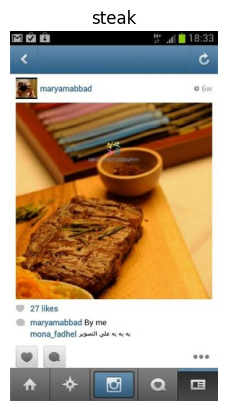

In [ ]:
#view the image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 288, 3), dtype=uint8, numpy=
array([[[  6,   8,   5],
        [  0,   1,   0],
        [  1,   3,   0],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[  0,   1,   0],
        [  1,   3,   0],
        [  0,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  4,   4,   4]],

       [[ 10,  12,   9],
        [  2,   4,   1],
        [  0,   2,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  3,   3,   3]],

       ...,

       [[107, 107, 107],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 70,  70,  70],
        [ 68,  68,  68],
        [ 66,  66,  66]],

       [[107, 107, 107],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 71,  71,  71],
        [ 69,  69,  69],
        [ 68,  68,  68]],

       [[107, 107, 107],
        [ 88,  88,  88],
        [ 88,  88,  88],
        ...,
        [ 71,  71,  7

##pre processing the Data

In [ ]:
#its actually a giant array/tensor of different pixel size
#view the shape of the img
img.shape
#returns width, length and color channels

(512, 288, 3)

1. turn all data into numbers
2. make sure all of your tensor are in the right shape
3. scale feature (normalize or standardize the tensor (/min() /max()))


In [ ]:
#get all the pixels values between 0 and 1 standard
# Building an end to end CNN model
# common pixel value is 255 thats why we divide for standardization /255.0

#load images
#preprocess our images
#build a CNN to find patterns in the images
#compile CNN
#fit the CNN to out training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed
tf.random.set_seed(42)

#preprocess the data (scaling) // making the data between 1 and 0
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#tell tf to setup path directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from directories and turn it in to batches (by default batch size is 32)
#target size is the size we want our images to be(we are resizing them)
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#next one. is for the test data which is valid data here
#flow_from_directory is a method of the ImageDataGenerator class that allows you to read images
#from a big numpy array and folders containing images. It is capable of automatically labeling the images based on the directory structure.
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode = "binary",
                                               seed=42)

#Building the CNN Model to find patterns on our images
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size = 3,
                          activation="relu",
                           input_shape=(224,224,3)),#3 is the color channel rgb)

     #layer here is same as the conv2d above but no names just number
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),

    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #1 because we are binary




])

#compile the cnn
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.binary_crossentropy,
              metrics=["accuracy"])

#fit the model
history = model.fit(train_data, epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 24s 185ms/step - loss: 0.6321 - accuracy: 0.6213 - val_loss: 0.4649 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 5s 114ms/step - loss: 0.4281 - accuracy: 0.8027 - val_loss: 0.3280 - val_accuracy: 0.8600
Epoch 3/10
47/47 [==============================] - 6s 130ms/step - loss: 0.3764 - accuracy: 0.8433 - val_loss: 0.3202 - val_accuracy: 0.8920
Epoch 4/10
47/47 [==============================] - 7s 144ms/step - loss: 0.3143 - accuracy: 0.8693 - val_loss: 0.2918 - val_accuracy: 0.8800
Epoch 5/10
47/47 [==============================] - 5s 113ms/step - loss: 0.2593 - accuracy: 0.9073 - val_loss: 0.3085 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 6s 124ms/step - loss: 0.2292 - accuracy: 0.9100 - val_loss: 0.3220 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 6s 124ms/ste

In [ ]:
model.save("conv_model1_5epoch4TGPU.h5")
#changing the gpu to t4 you can change it to runtime -> change runtime type not cpu

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# how can we use the same model as before to other datasets


##Breaking the. CNN model
- so we know the conv2 and maxpool
- we have to know other parameters as well
- and new way to create the standardization of the data

['356234.jpg']
image shape: (512, 384, 3)
['3324050.jpg']
image shape: (512, 512, 3)


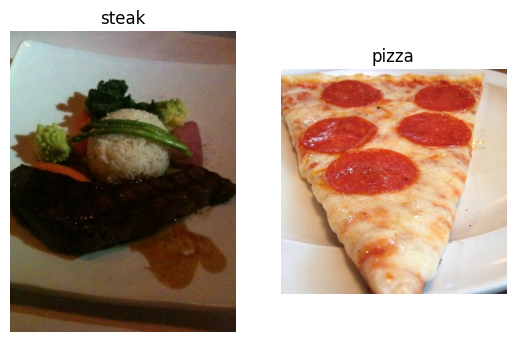

In [ ]:
#breaking down data
#visualization
#visualizing the data that we had
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

above was more like taking a familiarization of the data that we have it is all in the method that we created earlier
it is also in the github


##preprocessing data

In [33]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-07 21:03:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.207, 209.85.200.207, 209.85.234.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   212MB/s    in 0.5s    

2023-09-07 21:03:32 (212 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [34]:
#loading the data disection
#preprocessing the datasets path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
#next step is to turn all of our data to batches
#make sure that all the data are in the right shape


batches us a small subset of data. Rather than look at all
~10000 images at one time , amodel might only look at 32 at a time
think of it like threads
it does this for a couple of reasons:
  1. 10,000 images or more might not fit into memory processor(gpu_)
  2. trying to learn patterns in 10,000 images in one hit could resulkt uin the model not learning very well.

  why 32?

  because 32 is good for your health

In [4]:
!nvidia-smi


Wed Sep  6 21:15:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [36]:
#creating train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
#this will rescale the data n the directory



In [37]:
#Load in our image data from directories and turn them into batches
# we are using flow_from_directory is because the datas are in directories
train_data = train_datagen.flow_from_directory(directory = train_dir, #target directory
                                               target_size=(224,244), #target sizr of image (height and width)
                                               class_mode="binary", # type of data we are working on
                                               batch_size = 32) # size of mini batches
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [39]:
#get samples of train and test data
images, labels = train_data.next() # saying that get the next batch of images/labels
len(images), len(labels)

(32, 32)

In [46]:
#how many batches are there?
len(train_data),
#result is like 1500/32 32thats the batch size earlier
# the 1500 was Found 1500 images belonging to 2 classes.
#               Found 500 images belonging to 2 classes.
tf.constant(train_data) , tf.constant(test_data)

AttributeError: ignored

##Building the baseline CNN

- a baseline is a relatively simple model or existing result that you setups when beginning a machine learning

In [42]:
import tensorflow as tf
#these are the libraries that we will need
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,  #how many filters should pass on the tensor(10, 32,64,128 higher the value the more complex the data)
                           kernel_size = 3, #shape of the filter could be 3,5,7 lower values learn smaller feature
                           strides = 1, #if its one the filter cross 1 filter at a time you can pout it (1,1)
                           padding = "valid", #"same" or, "valid" valid lowers the outoput shhape if you want more info put same
                           activation = "relu",
                           input_shape =(224,224, 3) ) , #this is the input shape

    tf.keras.layers.Conv2D(10, 3, activation = "relu"), #same as above filter = 10 kernel = 3, strides will be 1 always and padding are same
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer (working with binary classificatication so its just 1 or zero)

])

#compile
model_1.compile(optimizer= tf.keras.optimizers.Adam(),
                loss= tf.keras.losses.binary_crossentropy,
                metrics=["accuracy"])

#get summary first
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [43]:
#check the length of the data first befre fitting it
len(train_data), len(test_data)

(47, 16)

In [47]:
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data) ,
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
_